In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Activation, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
class Model:    
#   ''''
#   Each successive line contians 785 comma separated values between 0 and 255
#   The first value is the label
#   The rest are the pixel values for that picture
#   The function, that will return 2 np.array types.
#   One with all the labels and other with all the images
#   ''''

    def __init__(self):
        def get_data(filename):
            with open(filename) as training_file:
                training_reader = csv.reader(training_file, delimiter=',')
                image = []
                labels = []
                line_count = 0
                for row in training_reader:
                    if line_count == 0:
                        line_count +=1
                    else:
                        labels.append(row[0])
                        temp_image = row[1:785]
                        image_data_as_array = np.array_split(temp_image, 28)
                        image.append(image_data_as_array)
                        line_count += 1
                images = np.array(image).astype('float')
                labels = np.array(labels).astype('float')
                print(f'Processed {line_count} lines.')
            return images, labels

        self.training_images, self.training_labels = get_data("sign_mnist_train.csv")
        self.testing_images, self.testing_labels = get_data("sign_mnist_test.csv")

        print("Total Training images", self.training_images.shape)
        print("Total Training labels",self.training_labels.shape)
        print("Total Testing images",self.testing_images.shape)
        print("Total Testing labels",self.testing_labels.shape)

        #Data Augmentation
        self.training_images = np.expand_dims(self.training_images, axis = 3)
        self.testing_images = np.expand_dims(self.testing_images, axis = 3)
        
        #Labels categorization
#         to_categorical(self.training_labels)[0, :]
#         to_categorical(self.testing_labels)[0, :]

        # Create an ImageDataGenerator and do Image Augmentation
        self.train_datagen = ImageDataGenerator(rescale=1. / 255,
          rotation_range=40,
          width_shift_range=0.2,
          height_shift_range=0.2,
          shear_range=0.2,
          zoom_range=0.2,
          horizontal_flip=True,
          fill_mode='nearest'
          )

        self.validation_datagen = ImageDataGenerator(rescale=1. / 255 )

        self.train_gen = self.train_datagen.flow(
          self.training_images,
          self.training_labels,
          batch_size=20
        )

        self.val_gen = self.validation_datagen.flow(
          self.testing_images,
          self.testing_labels,
          batch_size=20
        )
    
    def show_image(self, row_number):
        img = self.training_images[row_number][:].reshape(28,28)
        fig = plt.figure(figsize=(10,10))
        plt.imshow(img)
        plt.title("Picture of sign" + str(row_number))
        plt.show()
        
        
    def show_image_gray(self, row_number):
        img = self.training_images[row_number][:].reshape(28,28)
        fig = plt.figure(figsize=(10,10))
        plt.gray()
        plt.imshow(img)
        plt.title("Picture of sign" + str(row_number))
        plt.show()
        
    #function which creates easy model
    def create_model(self, experiment_name,
                    activation,
                    channels):
        input_shape = (28, 28, 1)
        num_classes = 26
        self.model = tf.keras.Sequential(
            [
                layers.Conv2D(channels, kernel_size=(3, 3), activation=activation, padding="same", input_shape=input_shape),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Conv2D(2 * channels, kernel_size=(3, 3), activation=activation),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Dropout(0.2),
                layers.Flatten(),
                layers.Dense(4 * channels, activation=activation),
                layers.Dense(num_classes, activation="softmax"),
            ]
        )
        return self.model
    
    def compile_model(self, experiment_name, max_epochs=20):
        self.model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", 
          metrics=["accuracy"])
        tensorboard_callback = tf.keras.callbacks.TensorBoard(
            log_dir=experiment_name, histogram_freq=1, write_graph=True,
            write_images=True, write_steps_per_second=True, update_freq='epoch',
            profile_batch=2, embeddings_freq=0, embeddings_metadata=None
        )
        early_stop = EarlyStopping(monitor='val_loss',min_delta=0.0001)
        self.model.summary()
        self.history = self.model.fit_generator(
          self.train_gen,
          epochs=max_epochs,
#           callbacks=[tensorboard_callback, early_stop],
          validation_data=self.val_gen  
      )

    #spr jakie mamy metryki    
    def evaluate_model(self):
        loss, acc = self.model.evaluate(self.testing_images, self.testing_labels, verbose=0)
        return print('Test metrics' % acc)
    
    #predict !!!!
    def predict_sign(self, sign_number):
        self.y_pred = self.model.predict(self.testing_images[sign_number][:])
        return print("Predicted sign: " + str(self.y_pred))    
    
    #DOKONCZYC!
    def show_metrics(self):
        cl_report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
        c_m = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
        tf.nn.softmax(myCNN.predict(x_test[:5])).numpy().argmax(axis=1)
        return print(cl_report, c_m)
        
    #function which plots accuracy and loss + !!!dorzucić lepsze tytuły
    def draw_results(self):
        fig = plt.figure()
        plt.subplot(2,1,1)
        title.set_text("model accuracy train batch")
        plt.plot(self.history.history['accuracy'])
        title.set_text("model accuracy validation batch")
        plt.plot(self.history.history['val_accuracy'])
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='lower right')
        plt.subplot(2,1,2)
        title.set_text("model loss train batch")
        plt.plot(self.history.history['loss'])
        title.set_text("model loss validation batch")
        plt.plot(self.history.history['val_loss'])
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper right')
        plt.tight_layout()
        return fig


In [1]:
%load_ext tensorboard

In [2]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 23076), started 7 days, 7:22:36 ago. (Use '!kill 23076' to kill it.)

In [8]:
dl_model = Model()
dl_model

Processed 27456 lines.
Processed 7173 lines.
Total Training images (27455, 28, 28)
Total Training labels (27455,)
Total Testing images (7172, 28, 28)
Total Testing labels (7172,)


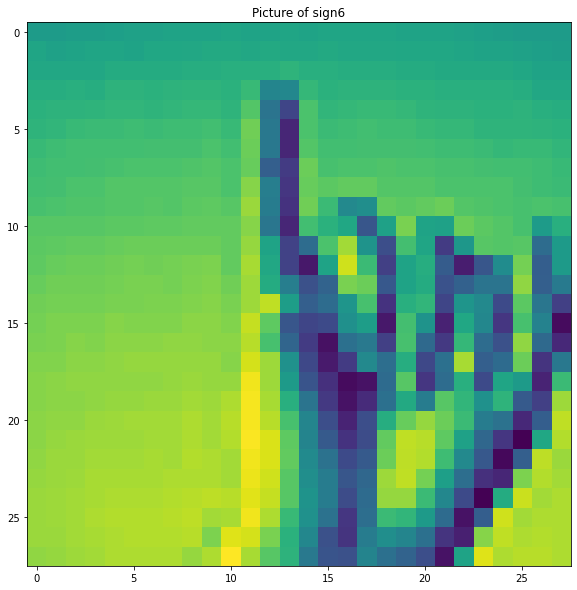

In [13]:
dl_model.show_image(6)

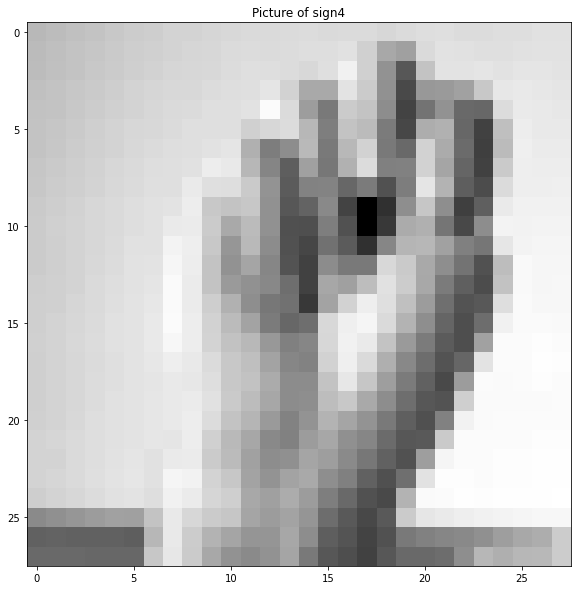

In [14]:
dl_model.show_image_gray(4)

In [9]:
dl_model.create_model("logs/model_1","relu",32)

In [10]:
dl_model.compile_model("logs/model_1")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               295040    
_________________________________________________________________
dense_3 (Dense)              (None, 26)               

C:\Users\dagmara.bromirska\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1373/1373 [==============================] - 13s 9ms/step - loss: 2.5744 - accuracy: 0.2117 - val_loss: 1.6212 - val_accuracy: 0.4441
Epoch 2/20
1373/1373 [==============================] - 15s 11ms/step - loss: 1.8474 - accuracy: 0.4078 - val_loss: 1.1253 - val_accuracy: 0.6333
Epoch 3/20
1373/1373 [==============================] - 17s 12ms/step - loss: 1.4584 - accuracy: 0.5222 - val_loss: 0.8333 - val_accuracy: 0.7179
Epoch 4/20
1373/1373 [==============================] - 24s 17ms/step - loss: 1.2542 - accuracy: 0.5863 - val_loss: 0.6877 - val_accuracy: 0.7476
Epoch 5/20
1373/1373 [==============================] - 25s 18ms/step - loss: 1.1045 - accuracy: 0.6317 - val_loss: 0.6666 - val_accuracy: 0.7600
Epoch 6/20
1373/1373 [==============================] - 23s 17ms/step - loss: 1.0053 - accuracy: 0.6673 - val_loss: 0.5331 - val_accuracy: 0.8168
Epoch 7/20
1373/1373 [==============================] - 23s 16ms/step - loss: 0.9077 - accuracy: 0.6958 - val_loss: 0.4404 - val_accurac

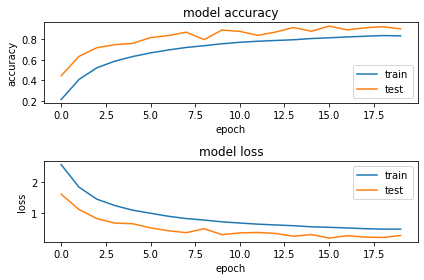

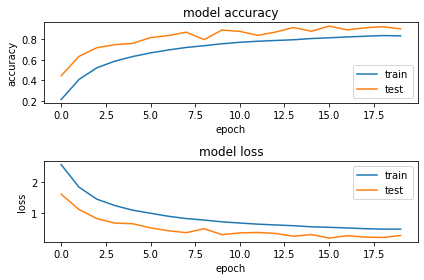

In [12]:
dl_model.draw_results()

In [13]:
dl_model.evaluate_model()

TypeError: not all arguments converted during string formatting

In [14]:
dl_model.predict_sign(6)

ValueError: in user code:

    C:\Users\dagmara.bromirska\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1569 predict_function  *
        return step_function(self, iterator)
    C:\Users\dagmara.bromirska\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\dagmara.bromirska\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\dagmara.bromirska\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\dagmara.bromirska\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\dagmara.bromirska\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1552 run_step  **
        outputs = model.predict_step(data)
    C:\Users\dagmara.bromirska\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1525 predict_step
        return self(x, training=False)
    C:\Users\dagmara.bromirska\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\dagmara.bromirska\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:230 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 28, 1)


In [19]:
df = pd.read_csv("sign_mnist_train.csv")


In [20]:
target = df["label"].to_numpy()

In [37]:
print(type(target))

<class 'numpy.ndarray'>


In [25]:
check = np.where(target==3)

In [30]:
check[0][2]


9

In [22]:
df.drop(columns="label", inplace=True)
features = df.to_numpy()

In [23]:
features

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]], dtype=int64)

In [55]:
sign_3 = df_array[0][:].reshape(28,28)
sign_3

array([[107, 118, 127, 134, 139, 143, 146, 150, 153, 156, 158, 160, 163,
        165, 159, 166, 168, 170, 170, 171, 171, 171, 172, 171, 171, 170,
        170, 169],
       [111, 121, 129, 135, 141, 144, 148, 151, 154, 157, 160, 163, 164,
        170, 119, 152, 171, 171, 170, 171, 172, 172, 172, 172, 172, 171,
        171, 170],
       [113, 123, 131, 137, 142, 145, 150, 152, 155, 158, 161, 163, 164,
        172, 105, 142, 170, 171, 171, 171, 172, 172, 173, 173, 172, 171,
        171, 171],
       [116, 125, 133, 139, 143, 146, 151, 153, 156, 159, 162, 163, 167,
        167,  95, 144, 171, 172, 172, 172, 172, 172, 173, 173, 173, 172,
        172, 171],
       [117, 126, 134, 140, 145, 149, 153, 156, 158, 161, 163, 164, 175,
        156,  87, 154, 172, 173, 173, 173, 173, 173, 174, 174, 174, 173,
        172, 172],
       [119, 128, 136, 142, 146, 150, 153, 156, 159, 163, 165, 164, 184,
        148,  89, 164, 172, 174, 174, 174, 174, 175, 175, 174, 175, 174,
        173, 173],
       [12

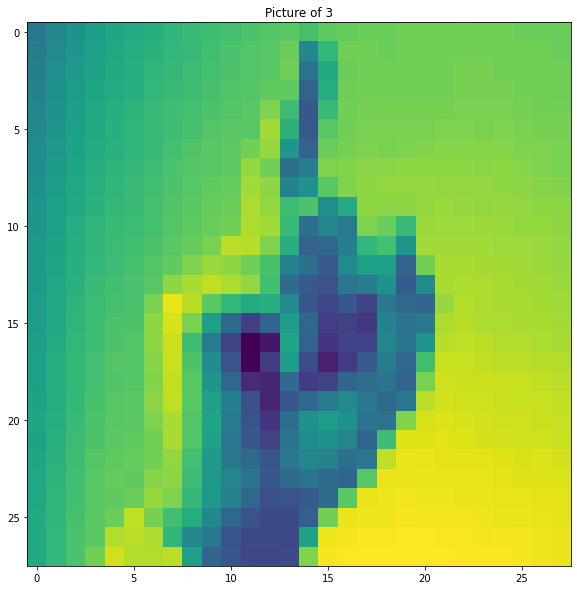

In [53]:
# self.img = self.images.reshape(16,16)
fig = plt.figure(figsize=(20,10))
plt.imshow(sign_3)
plt.title("Picture of 3")
plt.show()